# MNIST Dataset 88%

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch:  1 cost:  3.15005518762
Epoch:  2 cost:  1.15658033897
Epoch:  3 cost:  0.907257671736
Epoch:  4 cost:  0.783496842764
Epoch:  5 cost:  0.706427406642
Epoch:  6 cost:  0.652018086856
Epoch:  7 cost:  0.611638684056
Epoch:  8 cost:  0.579997879009
Epoch:  9 cost:  0.553607919812
Epoch:  10 cost:  0.53198624321
Epoch:  11 cost:  0.513541707735
Epoch:  12 cost:  0.497852323814
Epoch:  13 cost:  0.483820096322
Epoch:  14 cost:  0.471402888853
Epoch:  15 cost:  0.460808066617
Accuracy:  0.8871
Label:  [4]
Prediction:  [4]


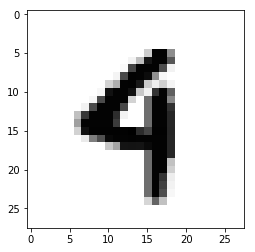

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

# MNIST Dataset 가져오기
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# shape = 28 * 28
nb_classes = 10
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# hypothesis - sosftmax
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
# cost
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))
# minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# measure
predicted = tf.argmax(hypothesis, 1)
is_correct = tf.equal(predicted, tf.argmax(Y, 1)) # 에측값이 참이면 True, 아니면 False
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# batch로 작업
training_epochs = 15 # 전체 데이터 셋을 모두 한번씩 학습시키는 것을 1 epoch이라고 한다
batch_size = 100 # 한번에 읽어들일 사이즈

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost= 0
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, train], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c/total_batch
        print('Epoch: ', epoch+1, 'cost: ', avg_cost)
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    # image
    r = random.randint(0, mnist.test.num_examples -1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r: r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

# MNIST Dataset - 88%, tf.nn.softmax_cross_entropy_with_logits

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch:  1 cost:  2.70565151941
Epoch:  2 cost:  1.04748777671
Epoch:  3 cost:  0.84261802863
Epoch:  4 cost:  0.74196420404
Epoch:  5 cost:  0.679246898104
Epoch:  6 cost:  0.633830097507
Epoch:  7 cost:  0.599248626368
Epoch:  8 cost:  0.571822220412
Epoch:  9 cost:  0.549146814048
Epoch:  10 cost:  0.529607166323
Epoch:  11 cost:  0.513234511438
Epoch:  12 cost:  0.499034112936
Epoch:  13 cost:  0.486636586189
Epoch:  14 cost:  0.47502654505
Epoch:  15 cost:  0.46521916617
Accuracy:  0.8893
Label:  [2]
Prediction:  [2]


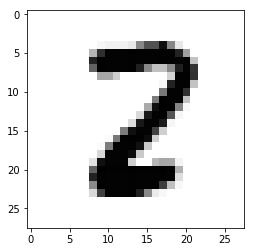

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

# MNIST Dataset 가져오기
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# shape = 28 * 28
nb_classes = 10
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# hypothesis - sosftmax
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

# cost
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y)
cost = tf.reduce_mean(cost_i)

# minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# measure
predicted = tf.argmax(hypothesis, 1)
is_correct = tf.equal(predicted, tf.argmax(Y, 1)) # 에측값이 참이면 True, 아니면 False
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# batch로 작업
training_epochs = 15 # 전체 데이터 셋을 모두 한번씩 학습시키는 것을 1 epoch이라고 한다
batch_size = 100 # 한번에 읽어들일 사이즈

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost= 0
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, train], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c/total_batch
        print('Epoch: ', epoch+1, 'cost: ', avg_cost)
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    # image
    r = random.randint(0, mnist.test.num_examples -1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r: r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()